In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [40]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [41]:
import pandas as pd

# Update the path based on where you have the file in your Google Drive
df = pd.read_csv('/content/drive/My Drive/btcNews_Data.csv')

# Display the first few rows
print(df.head())

        date                                              top_0  \
0  7/12/2015  bitcoin the next logical step in the rise of u...   
1  7/13/2015  bitgive foundation announces new initiatives a...   
2  7/14/2015  keynote 2015  harnessing the distributed ledge...   
3  7/15/2015  patrick byrne says   will be able to replace w...   
4  7/16/2015  2015 q1 bitcoin investment trumps 2014 numbers...   

                                               top_1  \
0  the blockchain  towards crypto sovereignty    ...   
1  bitcoin in review  interesting trends in q1 of...   
2  cash back vs bitcoin  why bitcoin can be super...   
3  bitcoin based transparent marketplaces can pre...   
4  california wants to suspend uber in attempt to...   

                                               top_2  \
0  coinbase outage is a reminder to not store bit...   
1  cloudminr user accounts hacked  data sold for ...   
2  force or mathematics  fiat vs cryptocurrency  ...   
3  vladimir putin speaks out in favo

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2146 non-null   object 
 1   top_0     2146 non-null   object 
 2   top_1     2119 non-null   object 
 3   top_2     2047 non-null   object 
 4   top_3     1849 non-null   object 
 5   top_4     1629 non-null   object 
 6   top_5     1382 non-null   object 
 7   top_6     1156 non-null   object 
 8   top_7     980 non-null    object 
 9   top_8     842 non-null    object 
 10  top_9     742 non-null    object 
 11  top_10    670 non-null    object 
 12  top_11    587 non-null    object 
 13  top_12    502 non-null    object 
 14  top_13    434 non-null    object 
 15  top_14    367 non-null    object 
 16  top_15    304 non-null    object 
 17  top_16    269 non-null    object 
 18  top_17    229 non-null    object 
 19  top_18    197 non-null    object 
 20  top_19    166 non-null    obje

In [43]:
df.describe

<bound method NDFrame.describe of            date                                              top_0  \
0     7/12/2015  bitcoin the next logical step in the rise of u...   
1     7/13/2015  bitgive foundation announces new initiatives a...   
2     7/14/2015  keynote 2015  harnessing the distributed ledge...   
3     7/15/2015  patrick byrne says   will be able to replace w...   
4     7/16/2015  2015 q1 bitcoin investment trumps 2014 numbers...   
...         ...                                                ...   
2141  5/30/2021  after the installation of microbt whatsminers ...   
2142  5/31/2021  brazil is one of the pioneers of cdbc s study ...   
2143   6/1/2021   our maiden  sto listing on the dbs digital ex...   
2144   6/2/2021   expanding cryptocurrency analysis to find and...   
2145   6/3/2021   advertisers offering  cryptocurrency exchange...   

                                                  top_1  \
0     the blockchain  towards crypto sovereignty    ...   
1     bitcoin in review  interesting trends in q1 of...   
2     cash back vs bitcoin  why bitcoin can be super...   
3     bitcoin based transparent marketplaces can pre...   
4     california wants to suspend uber in attempt to...   
...                                                 ...   
2141                                                NaN   
2142                                                NaN   
2143                                                NaN   
2144                                                NaN   
2145                                                NaN   

                                                  top_2  \
0     coinbase outage is a reminder to not store bit...   
1     cloudminr user accounts hacked  data sold for ...   
2     force or mathematics  fiat vs cryptocurrency  ...   
3     vladimir putin speaks out in favor of bitcoin ...   
4         kraken announces new fee structure    bitcoin   
...                                                 ...   
2141                                                NaN   
2142                                                NaN   
2143                                                NaN   
2144                                                NaN   
2145                                                NaN   

                                                  top_3  \
0     2015 q1 bitcoin vc investment trumps the numbe...   
1     the block size debate and  sock puppet  accusa...   
2     the 9 most visited websites in the bitcoin eco...   
3       apple pay  same old ball  amp  chain    bitcoin   
4     fintech   the rehashing of old payment methods...   
...                                                 ...   
2141                                                NaN   
2142                                                NaN   
2143                                                NaN   
2144                                                NaN   
2145                                                NaN   

                                                  top_4  \
0     future use cases for blockhain technology  dis...   
1     future use cases for blockchain technology   p...   
2     future use cases of blockchain technology  dec...   
3     what happens to bitcoin miners when all coins ...   
4     purse io offers plenty of bitcoin arbitrage op...   
...                                                 ...   
2141                                                NaN   
2142                                                NaN   
2143                                                NaN   
2144                                                NaN   
2145                                                NaN   

                                                  top_5  \
0     poloniex leaves new york due to bitlicense    ...   
1     the low hanging fruit of bitcoin adoption   vi...   
2     the kids keep asking  bitcoin  are we there ye...   
3     banks could be working on blockchain based dig.

In [44]:
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,7/12/2015,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%
1,7/13/2015,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,7/14/2015,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,the tremendous interest we are seeing in thes...,palantir technologies peter thiel has been a ...,another reason why the bitcoin hashrate is dr...,NaN,287.0,290.4,297.0,285.2,60.62K,-1.17%
3,7/15/2015,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take...,e coin bitcoin cards an interview with georgy...,...,here and now the perspective is shifted bac...,binance is being probed by the u s department...,NaN,NaN,283.4,287.0,292.9,283.2,59.58K,-1.23%
4,7/16/2015,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,the company is already accepting bitcoin so ...,the learning course is also being used to prep...,NaN,NaN,276.6,283.4,290.8,273.3,121.32K,-2.41%


## Part 1: Predict Using the Numerical Data

### Pre-processing

In [45]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2146 non-null   datetime64[ns]
 1   top_0     2146 non-null   object        
 2   top_1     2119 non-null   object        
 3   top_2     2047 non-null   object        
 4   top_3     1849 non-null   object        
 5   top_4     1629 non-null   object        
 6   top_5     1382 non-null   object        
 7   top_6     1156 non-null   object        
 8   top_7     980 non-null    object        
 9   top_8     842 non-null    object        
 10  top_9     742 non-null    object        
 11  top_10    670 non-null    object        
 12  top_11    587 non-null    object        
 13  top_12    502 non-null    object        
 14  top_13    434 non-null    object        
 15  top_14    367 non-null    object        
 16  top_15    304 non-null    object        
 17  top_16    269 

In [47]:
# Function to convert volume string to numeric value
def convert_volume(vol_str):
    if 'K' in vol_str:
        return float(vol_str.replace('K', '')) * 1000
    elif 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1_000_000
    elif 'B' in vol_str:
        return float(vol_str.replace('B', '')) * 1_000_000_000
    else:
        return float(vol_str)  # For plain numbers

# Apply the function to the 'vol.' column
df['vol.'] = df['vol.'].apply(convert_volume)

In [48]:
# Clean the 'change %' column as before
df['change %'] = df['change %'].replace('%', '', regex=True).astype(float) / 100

In [49]:
# Display the cleaned DataFrame
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,2015-07-12,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120700.0,0.0633
1,2015-07-13,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146850.0,-0.0647
2,2015-07-14,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,the tremendous interest we are seeing in thes...,palantir technologies peter thiel has been a ...,another reason why the bitcoin hashrate is dr...,NaN,287.0,290.4,297.0,285.2,60620.0,-0.0117
3,2015-07-15,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take...,e coin bitcoin cards an interview with georgy...,...,here and now the perspective is shifted bac...,binance is being probed by the u s department...,NaN,NaN,283.4,287.0,292.9,283.2,59580.0,-0.0123
4,2015-07-16,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,the company is already accepting bitcoin so ...,the learning course is also being used to prep...,NaN,NaN,276.6,283.4,290.8,273.3,121320.0,-0.0241


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2146 non-null   datetime64[ns]
 1   top_0     2146 non-null   object        
 2   top_1     2119 non-null   object        
 3   top_2     2047 non-null   object        
 4   top_3     1849 non-null   object        
 5   top_4     1629 non-null   object        
 6   top_5     1382 non-null   object        
 7   top_6     1156 non-null   object        
 8   top_7     980 non-null    object        
 9   top_8     842 non-null    object        
 10  top_9     742 non-null    object        
 11  top_10    670 non-null    object        
 12  top_11    587 non-null    object        
 13  top_12    502 non-null    object        
 14  top_13    434 non-null    object        
 15  top_14    367 non-null    object        
 16  top_15    304 non-null    object        
 17  top_16    269 

### 1. Exploratory Data Analysis (EDA) on Numerical Data

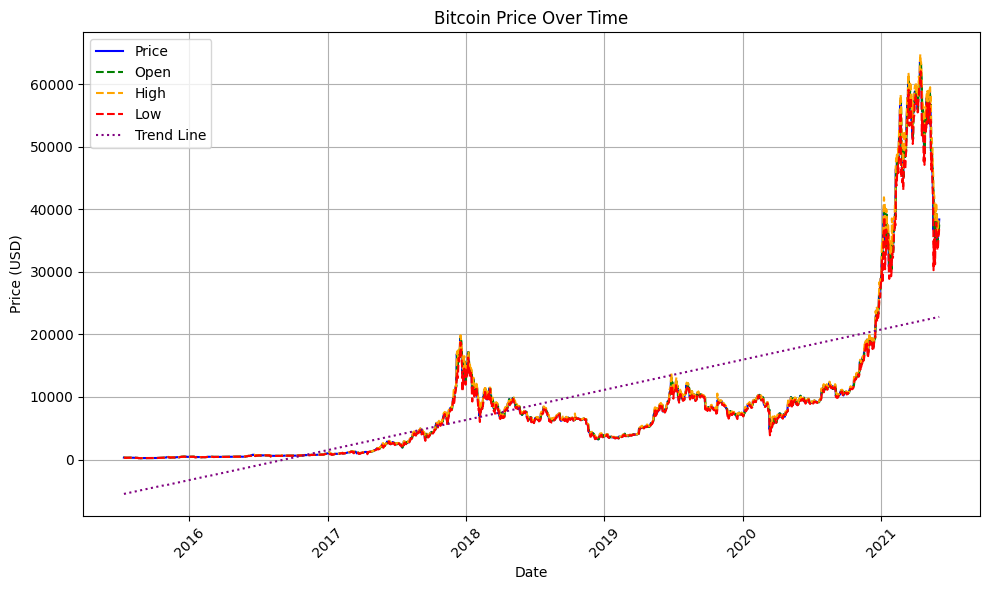

In [51]:
# 1. a. Visualize the historical price movements using line charts to identify trends
plt.figure(figsize=(10, 6))

# Plot the actual price data
plt.plot(df['date'], df['price'], label='Price', color='blue')

# Plot open, high, and low prices
plt.plot(df['date'], df['open'], label='Open', color='green', linestyle='--')
plt.plot(df['date'], df['high'], label='High', color='orange', linestyle='--')
plt.plot(df['date'], df['low'], label='Low', color='red', linestyle='--')

# Calculate the trend line for the price
z = np.polyfit(df.index, df['price'], 1)  # Fit a line (degree 1)
p = np.poly1d(z)  # Create a polynomial function
plt.plot(df['date'], p(df.index), label='Trend Line', color='purple', linestyle=':')

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

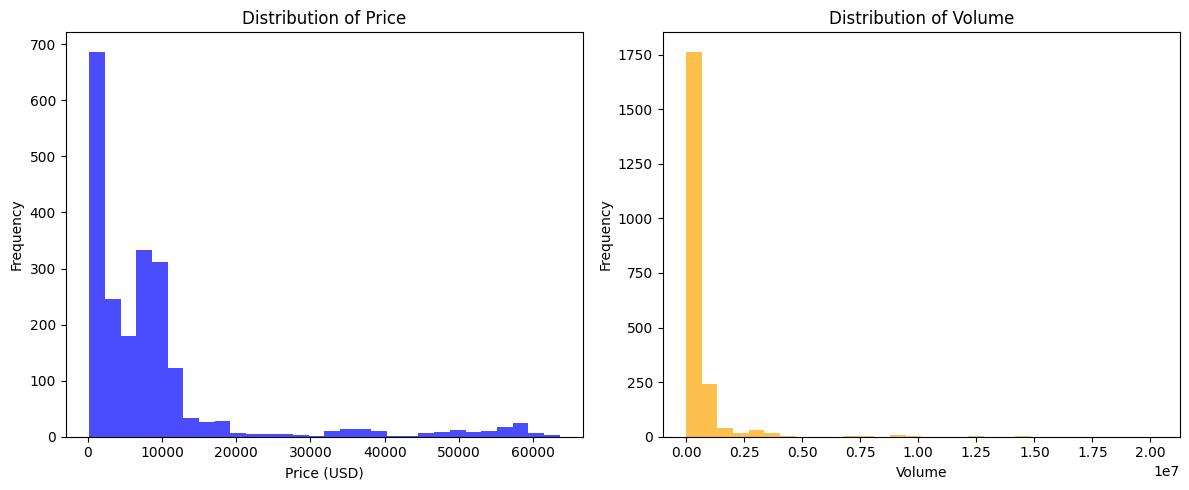

In [52]:
plt.figure(figsize=(12, 5))

# Histogram for price
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

# Histogram for volume
plt.subplot(1, 2, 2)
plt.hist(df['vol.'], bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

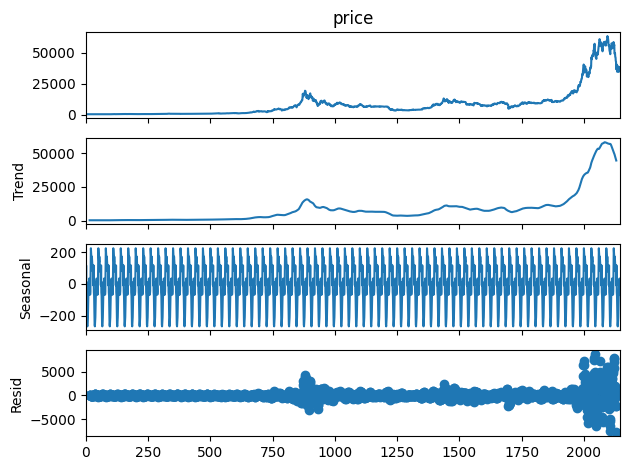

In [53]:
# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the price series
decomposition = seasonal_decompose(df['price'], model='additive', period=30)  # Adjust period as needed
fig = decomposition.plot()
plt.show()

Price (Observed):

This is the original Bitcoin price time series. It shows how the price has evolved over time. The x-axis represents time (possibly days), and the y-axis represents the Bitcoin price in USD.
There is a significant price spike after the midpoint of the time series, with a peak towards the end. This likely corresponds to Bitcoin’s major price surges in recent years.

Trend:

This subplot represents the underlying trend component in the data, which captures long-term movement or direction.
The trend shows a steady increase over time, with the biggest upward movement towards the end of the series. This matches major price growth trends in Bitcoin over the last few years.

Seasonal:

This subplot shows the seasonal component of the time series, which repeats at regular intervals. In this case, the interval could be daily, weekly, or monthly, depending on the time granularity.
The repeating pattern here indicates that the price data has strong seasonal effects, with peaks and troughs occurring at regular intervals, possibly reflecting daily or weekly market cycles.

Residual:

The residual component shows the remaining noise or irregular fluctuations after removing the trend and seasonal components.
The residuals seem to increase in magnitude as we move forward in time, which could indicate that the volatility or noise in Bitcoin prices has increased, especially in recent years.

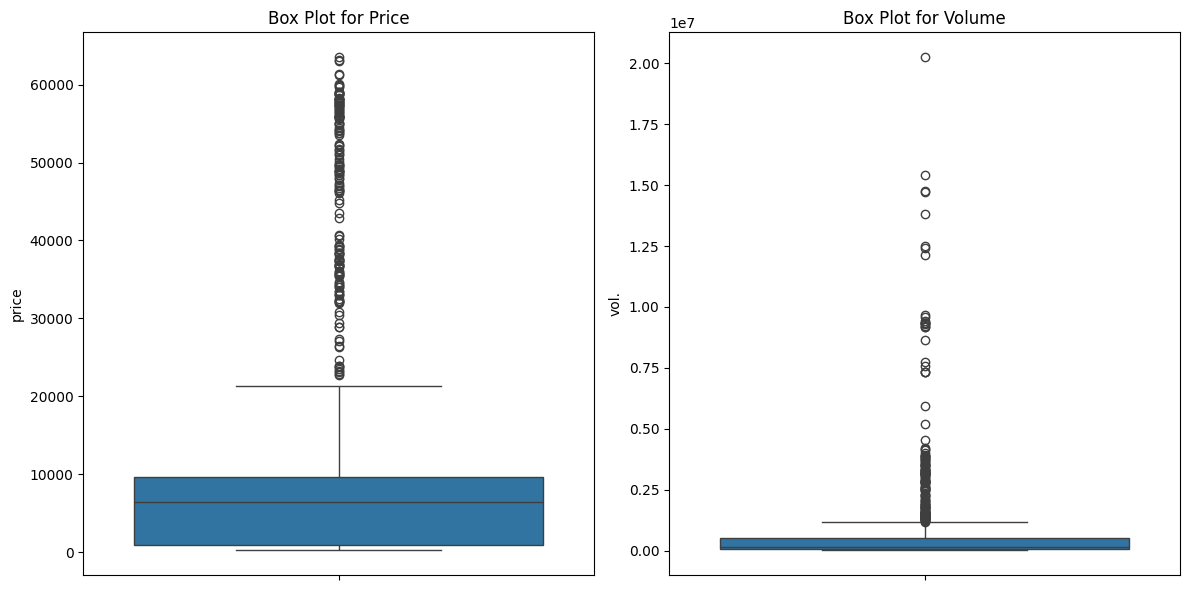

In [54]:
plt.figure(figsize=(12, 6))

# Box plot for price
plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'])
plt.title('Box Plot for Price')

# Box plot for volume
plt.subplot(1, 2, 2)
sns.boxplot(y=df['vol.'])
plt.title('Box Plot for Volume')

plt.tight_layout()
plt.show()

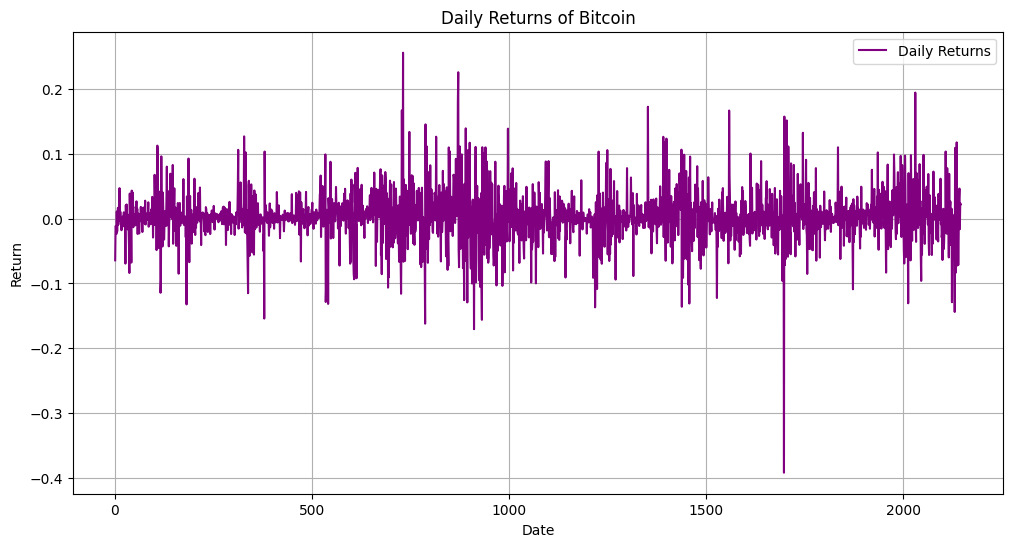

In [55]:
# Calculate daily returns
df['daily_return'] = df['price'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(df['daily_return'], label='Daily Returns', color='purple')
plt.title('Daily Returns of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

Around day 500 and between day 1000 and day 1500, we can see clusters of more pronounced spikes, which may suggest a period of increased volatility for Bitcoin.
This could coincide with major market events or news related to cryptocurrencies that caused sudden shifts in prices.

In [56]:
# Assuming df has two columns: 'Date' and 'Daily Return'
max_return = df['daily_return'].max()
min_return = df['daily_return'].min()

# Finding the dates with the highest and lowest returns
max_return_date = df['date'][df['daily_return'].idxmax()]
min_return_date = df['date'][df['daily_return'].idxmin()]

print(f"The highest daily return occurred on {max_return_date} with a return of {max_return}.")
print(f"The lowest daily return occurred on {min_return_date} with a return of {min_return}.")

The highest daily return occurred on 2017-07-20 00:00:00 with a return of 0.2555857355647069.
The lowest daily return occurred on 2020-03-12 00:00:00 with a return of -0.3918161081775907.


In [57]:
# Assuming the DataFrame is indexed correctly to correspond to the days
date_day_500 = df['date'].iloc[500]  # Get the date for day 500
date_day_1000 = df['date'].iloc[1000]  # Get the date for day 1000
date_day_1500 = df['date'].iloc[1500]  # Get the date for day 1500

print(f"Date for day 500: {date_day_500}")
print(f"Date for day 1000: {date_day_1000}")
print(f"Date for day 1500: {date_day_1500}")

Date for day 500: 2016-12-01 00:00:00
Date for day 1000: 2018-04-15 00:00:00
Date for day 1500: 2019-08-28 00:00:00


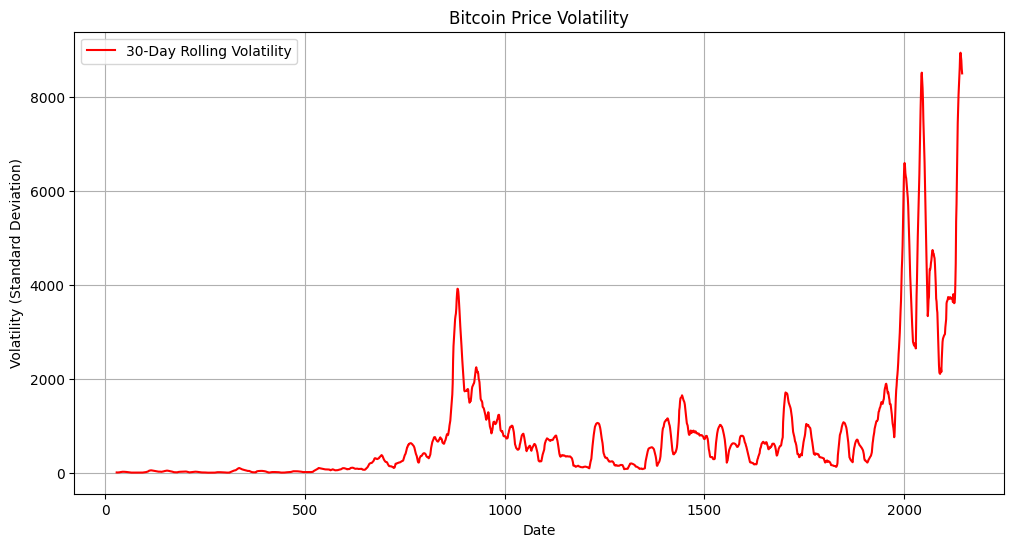

In [58]:
# Calculate rolling standard deviation
df['rolling_volatility'] = df['price'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['rolling_volatility'], label='30-Day Rolling Volatility', color='red')
plt.title('Bitcoin Price Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.grid(True)
plt.show()

### Parametrics and non - parametrics measures

In [59]:
# 1. b. Compute parametric measures
# Parametric measures include mean and standard deviation
mean_price = df['price'].mean()
std_price = df['price'].std()

mean_open = df['open'].mean()
std_open = df['open'].std()

mean_high = df['high'].mean()
std_high = df['high'].std()

mean_low = df['low'].mean()
std_low = df['low'].std()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2146 non-null   datetime64[ns]
 1   top_0               2146 non-null   object        
 2   top_1               2119 non-null   object        
 3   top_2               2047 non-null   object        
 4   top_3               1849 non-null   object        
 5   top_4               1629 non-null   object        
 6   top_5               1382 non-null   object        
 7   top_6               1156 non-null   object        
 8   top_7               980 non-null    object        
 9   top_8               842 non-null    object        
 10  top_9               742 non-null    object        
 11  top_10              670 non-null    object        
 12  top_11              587 non-null    object        
 13  top_12              502 non-null    object      

In [61]:
# Non-parametric measures: mode, IQR
import pandas as pd
from scipy import stats

# Assuming df is already defined as a DataFrame

# Mode for each column
mode_values = df[['price', 'open', 'high', 'low', 'vol.', 'change %']].mode().iloc[0]

# IQR (Interquartile Range) for each column
Q1 = df[['price', 'open', 'high', 'low', 'vol.', 'change %']].quantile(0.25)
Q3 = df[['price', 'open', 'high', 'low', 'vol.', 'change %']].quantile(0.75)
IQR = Q3 - Q1

print("Non-Parametric Measures:")
print("Mode for each column:")
print(mode_values)

print("\nIQR for each column:")
print(IQR)

Non-Parametric Measures:
Mode for each column:
price           229.500
open            229.500
high            228.400
low             592.800
vol.        1050000.000
change %         -0.005
Name: 0, dtype: float64

IQR for each column:
price         8682.575000
open          8673.925000
high          8836.000000
low           8453.250000
vol.        447530.000000
change %         0.029975
dtype: float64


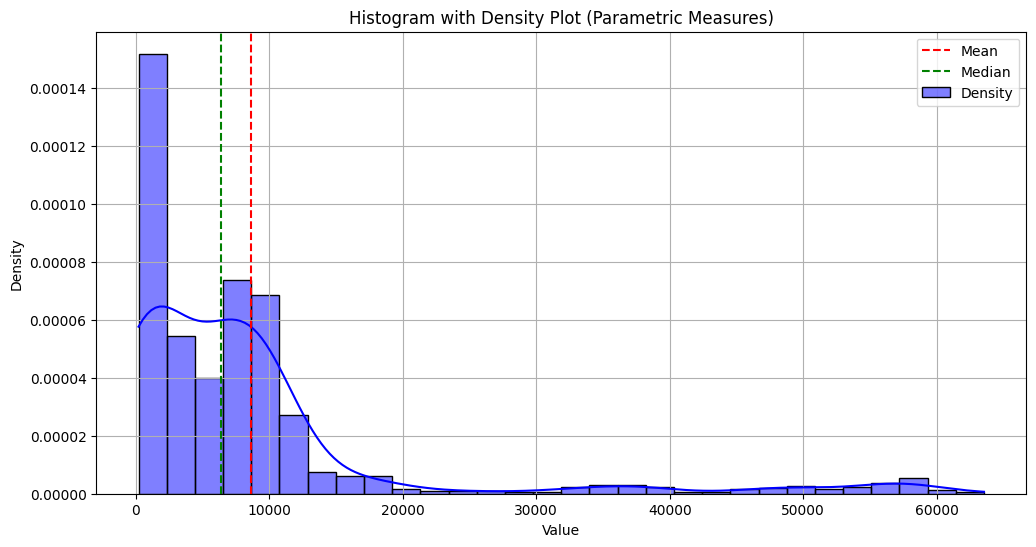

In [62]:
# Histogram with density plot
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True, color='blue', stat='density', label='Density')
plt.axvline(df['price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['price'].median(), color='green', linestyle='--', label='Median')
plt.title('Histogram with Density Plot (Parametric Measures)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
# 1. c. Compute non-parametric measures
# Non-parametric measures include median and interquartile range (IQR)
median_price = df['price'].median()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

median_open = df['open'].median()
iqr_open = df['open'].quantile(0.75) - df['open'].quantile(0.25)

median_high = df['high'].median()
iqr_high = df['high'].quantile(0.75) - df['high'].quantile(0.25)

median_low = df['low'].median()
iqr_low = df['low'].quantile(0.75) - df['low'].quantile(0.25)

In [64]:
# 1. d. Compare parametric and non-parametric measures
print("Parametric Measures:")
print(f"Mean Price: {mean_price:.2f}, Standard Deviation Price: {std_price:.2f}")
print(f"Mean Open: {mean_open:.2f}, Standard Deviation Open: {std_open:.2f}")
print(f"Mean High: {mean_high:.2f}, Standard Deviation High: {std_high:.2f}")
print(f"Mean Low: {mean_low:.2f}, Standard Deviation Low: {std_low:.2f}")

print("\nNon-Parametric Measures:")
print(f"Median Price: {median_price:.2f}, IQR Price: {iqr_price:.2f}")
print(f"Median Open: {median_open:.2f}, IQR Open: {iqr_open:.2f}")
print(f"Median High: {median_high:.2f}, IQR High: {iqr_high:.2f}")
print(f"Median Low: {median_low:.2f}, IQR Low: {iqr_low:.2f}")

Parametric Measures:
Mean Price: 8649.91, Standard Deviation Price: 12071.30
Mean Open: 8632.00, Standard Deviation Open: 12055.22
Mean High: 8896.11, Standard Deviation High: 12454.35
Mean Low: 8336.82, Standard Deviation Low: 11588.47

Non-Parametric Measures:
Median Price: 6394.95, IQR Price: 8682.58
Median Open: 6391.00, IQR Open: 8673.92
Median High: 6528.80, IQR High: 8836.00
Median Low: 6278.90, IQR Low: 8453.25


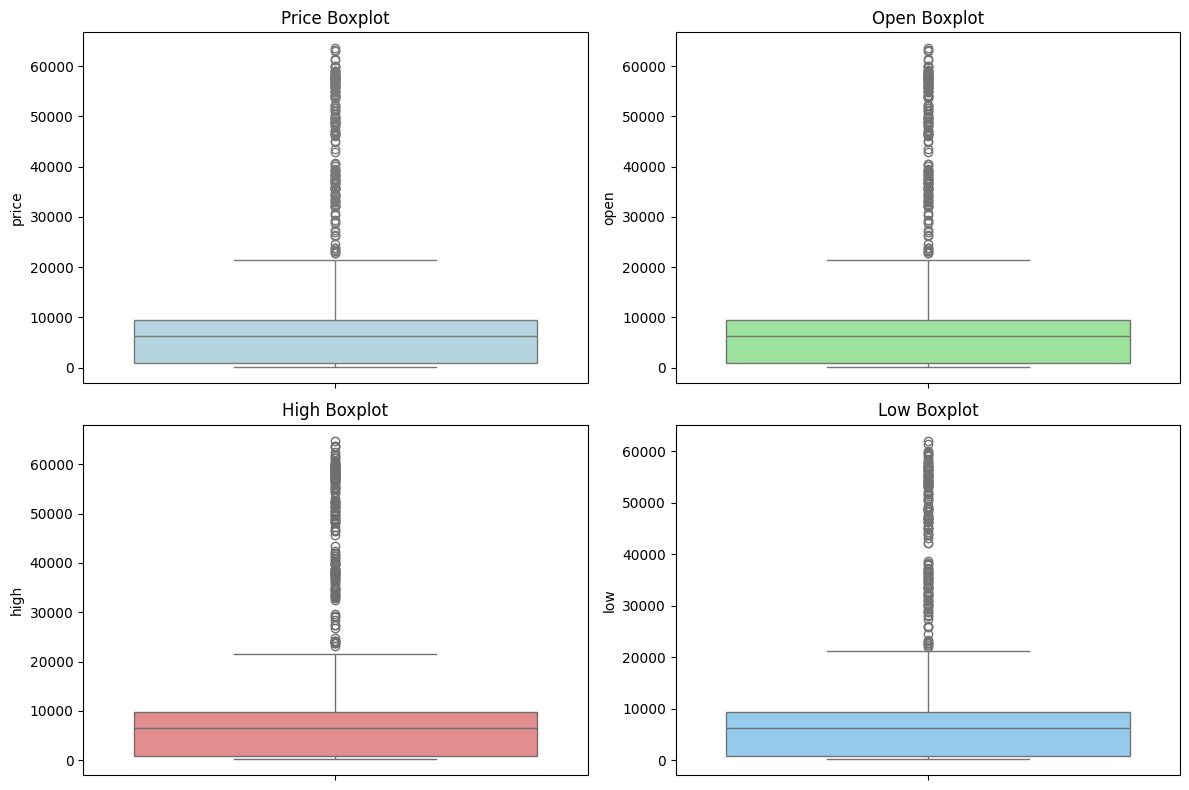

In [65]:
# Visual comparison of parametric and non-parametric measures
fig, axs = plt.subplots(2, 2, figsize=(12,8))
sns.boxplot(df['price'], ax=axs[0, 0], color='lightblue').set_title('Price Boxplot')
sns.boxplot(df['open'], ax=axs[0, 1], color='lightgreen').set_title('Open Boxplot')
sns.boxplot(df['high'], ax=axs[1, 0], color='lightcoral').set_title('High Boxplot')
sns.boxplot(df['low'], ax=axs[1, 1], color='lightskyblue').set_title('Low Boxplot')
plt.tight_layout()
plt.show()

### 2. Handle missing values

In [66]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_time_series_data.csv')  # Replace with your dataset path

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to summarize the missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_summary[missing_summary['Missing Values'] > 0])  # Display columns with missing values


                    Missing Values  Percentage
top_1                           27    1.258155
top_2                           99    4.613234
top_3                          297   13.839702
top_4                          517   24.091333
top_5                          764   35.601118
top_6                          990   46.132339
top_7                         1166   54.333644
top_8                         1304   60.764212
top_9                         1404   65.424045
top_10                        1476   68.779124
top_11                        1559   72.646785
top_12                        1644   76.607642
top_13                        1712   79.776328
top_14                        1779   82.898416
top_15                        1842   85.834110
top_16                        1877   87.465051
top_17                        1917   89.328984
top_18                        1949   90.820130
top_19                        1980   92.264678
top_20                        2003   93.336440
top_21       

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2146 non-null   datetime64[ns]
 1   top_0               2146 non-null   object        
 2   top_1               2119 non-null   object        
 3   top_2               2047 non-null   object        
 4   top_3               1849 non-null   object        
 5   top_4               1629 non-null   object        
 6   top_5               1382 non-null   object        
 7   top_6               1156 non-null   object        
 8   top_7               980 non-null    object        
 9   top_8               842 non-null    object        
 10  top_9               742 non-null    object        
 11  top_10              670 non-null    object        
 12  top_11              587 non-null    object        
 13  top_12              502 non-null    object      

### 3. Identifying Outliers in Time Series
Objective: To detect anomalies that may affect the quality of predictions.
Hint:
a. Visualize outliers using box plots and time series plots.
b. Explore the way to find outliers in time series

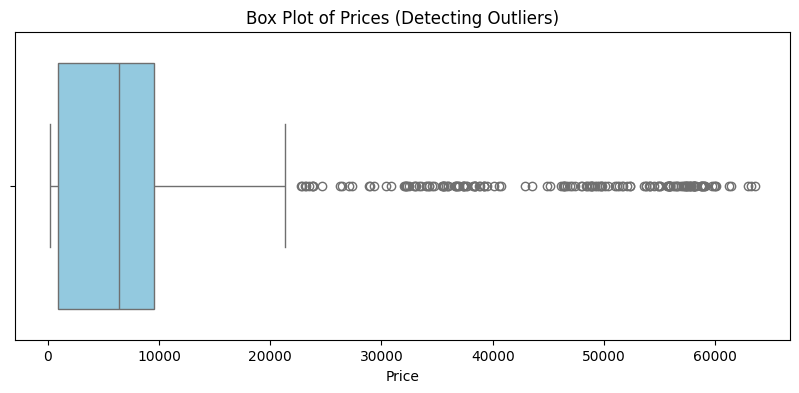

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# a. Box Plot for detecting outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Box Plot of Prices (Detecting Outliers)')
plt.xlabel('Price')
plt.show()

#### Z-score

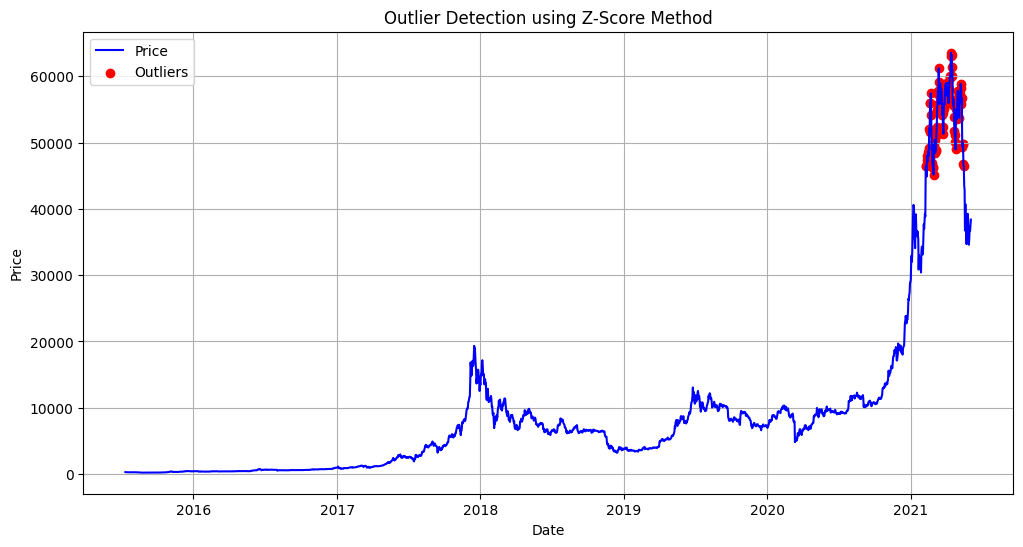

In [69]:
# Z-Score calculation for outlier detection
df['z_score'] = (df['price'] - df['price'].mean()) / df['price'].std()

# Identify outliers where the Z-score exceeds the threshold (e.g., 3)
outliers = df[np.abs(df['z_score']) > 3]

# Plot with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], label='Price', color='blue')
plt.scatter(outliers['date'], outliers['price'], color='red', label='Outliers', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Outlier Detection using Z-Score Method')
plt.legend()
plt.grid(True)
plt.show()

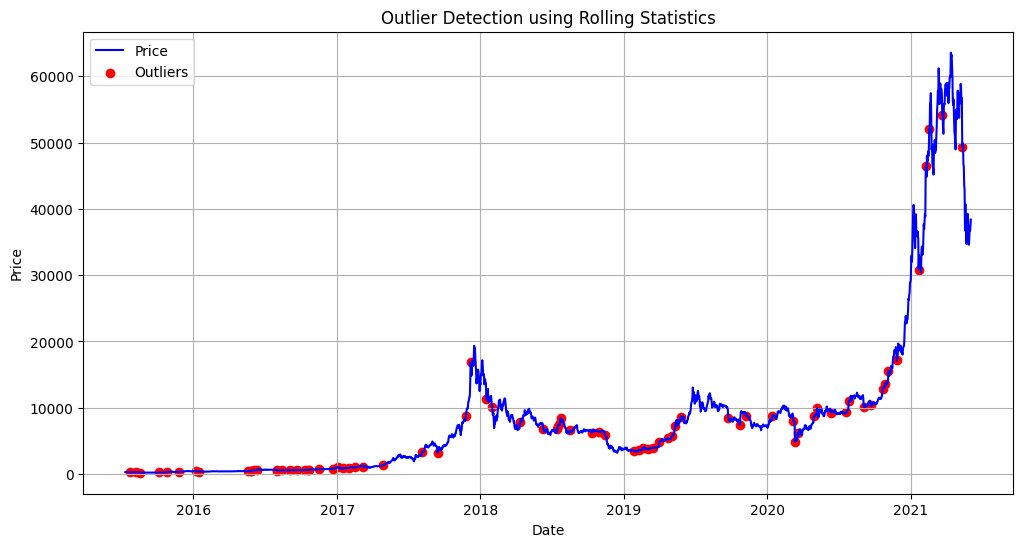

In [70]:
# Calculate rolling mean and standard deviation
window_size = 7  # e.g., 7 days
df['rolling_mean'] = df['price'].rolling(window=window_size).mean()
df['rolling_std'] = df['price'].rolling(window=window_size).std()

# Identify outliers where the price exceeds 2 standard deviations from the rolling mean
df['outlier'] = (df['price'] > df['rolling_mean'] + 2 * df['rolling_std']) | (df['price'] < df['rolling_mean'] - 2 * df['rolling_std'])

# Plot time series with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], label='Price', color='blue')
plt.scatter(df[df['outlier']]['date'], df[df['outlier']]['price'], color='red', label='Outliers', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Outlier Detection using Rolling Statistics')
plt.legend()
plt.grid(True)
plt.show()

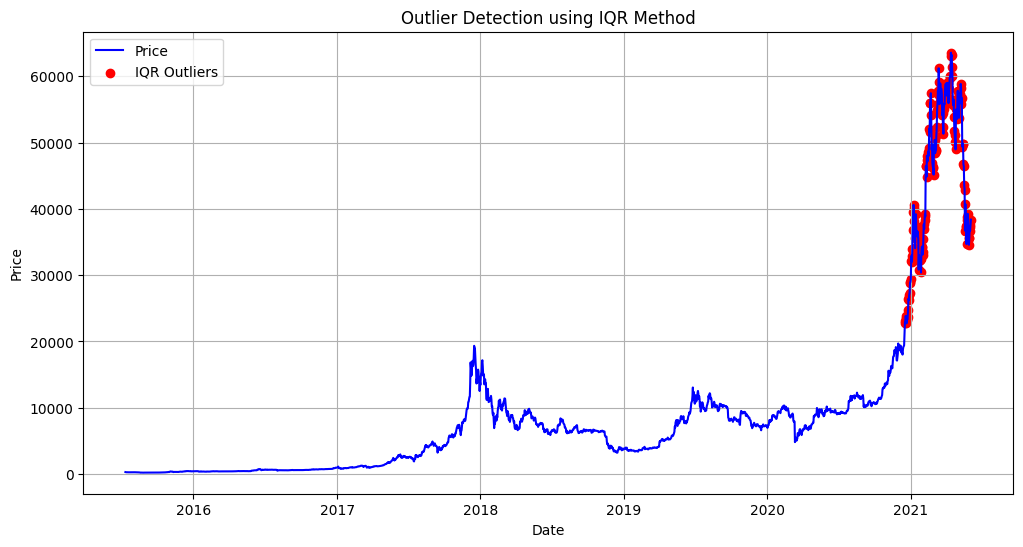

In [71]:
# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
outliers_iqr = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]

# Plot time series with IQR-based outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], label='Price', color='blue')
plt.scatter(outliers_iqr['date'], outliers_iqr['price'], color='red', label='IQR Outliers', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Outlier Detection using IQR Method')
plt.legend()
plt.grid(True)
plt.show()

### 4. Explore moving averages in time series

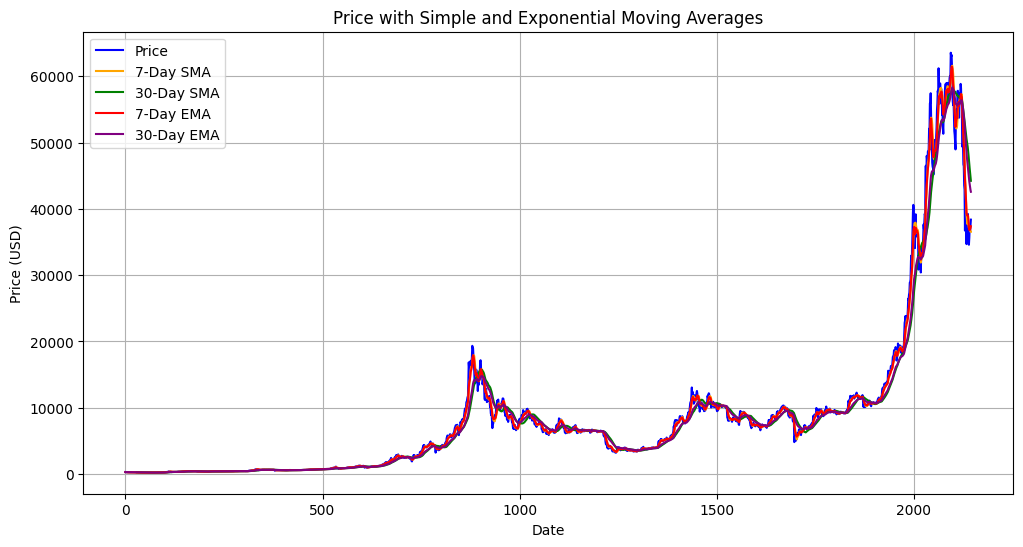

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a 'price' column and a 'date' index
# Calculate Simple Moving Averages (SMA)
df['SMA_7'] = df['price'].rolling(window=7).mean()
df['SMA_30'] = df['price'].rolling(window=30).mean()

# Calculate Exponential Moving Averages (EMA)
df['EMA_7'] = df['price'].ewm(span=7, adjust=False).mean()
df['EMA_30'] = df['price'].ewm(span=30, adjust=False).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['price'], label='Price', color='blue')
plt.plot(df['SMA_7'], label='7-Day SMA', color='orange')
plt.plot(df['SMA_30'], label='30-Day SMA', color='green')
plt.plot(df['EMA_7'], label='7-Day EMA', color='red')
plt.plot(df['EMA_30'], label='30-Day EMA', color='purple')

plt.title('Price with Simple and Exponential Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### 5. Exploring lag variables in time series (ACF and PCF)

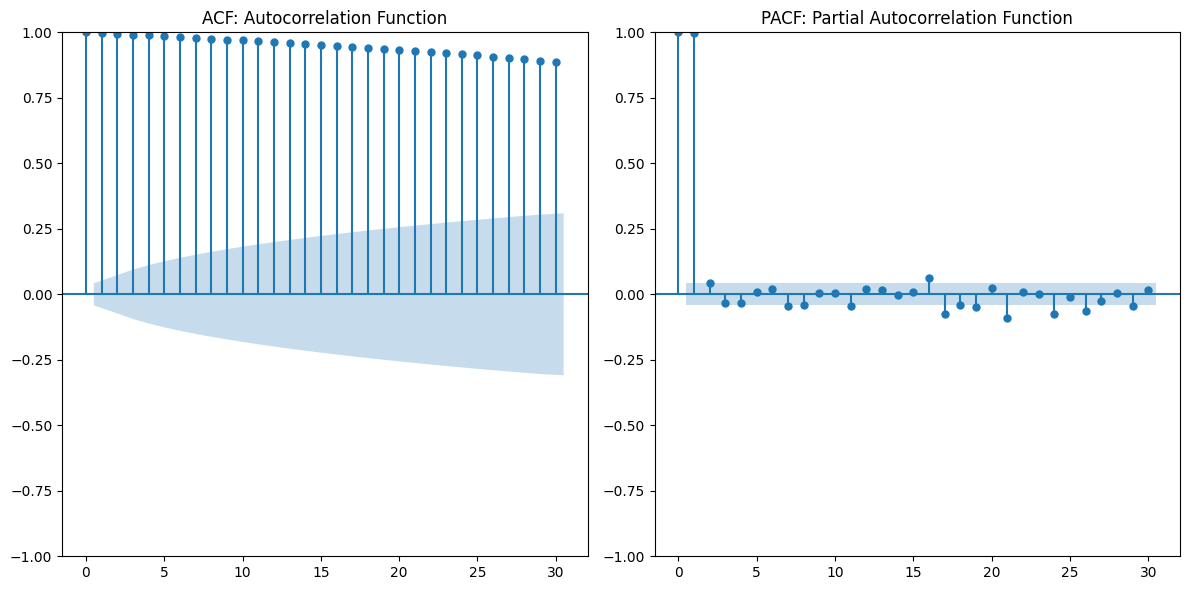

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF (autocorrelation)
plt.subplot(1, 2, 1)
plot_acf(df['price'], lags=30, ax=plt.gca())
plt.title('ACF: Autocorrelation Function')

# PACF (partial autocorrelation)
plt.subplot(1, 2, 2)
plot_pacf(df['price'], lags=30, ax=plt.gca())
plt.title('PACF: Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

### 6. Metrics for Time Series Prediction

In [74]:
pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/4__at1gc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/0qa761uw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76720', 'data', 'file=/tmp/tmplftdupq8/4__at1gc.json', 'init=/tmp/tmplftdupq8/0qa761uw.json', 'output', 'file=/tmp/tmplftdupq8/prophet_model8kjwffhb/prophet_model-20241024020843.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:08:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:08:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


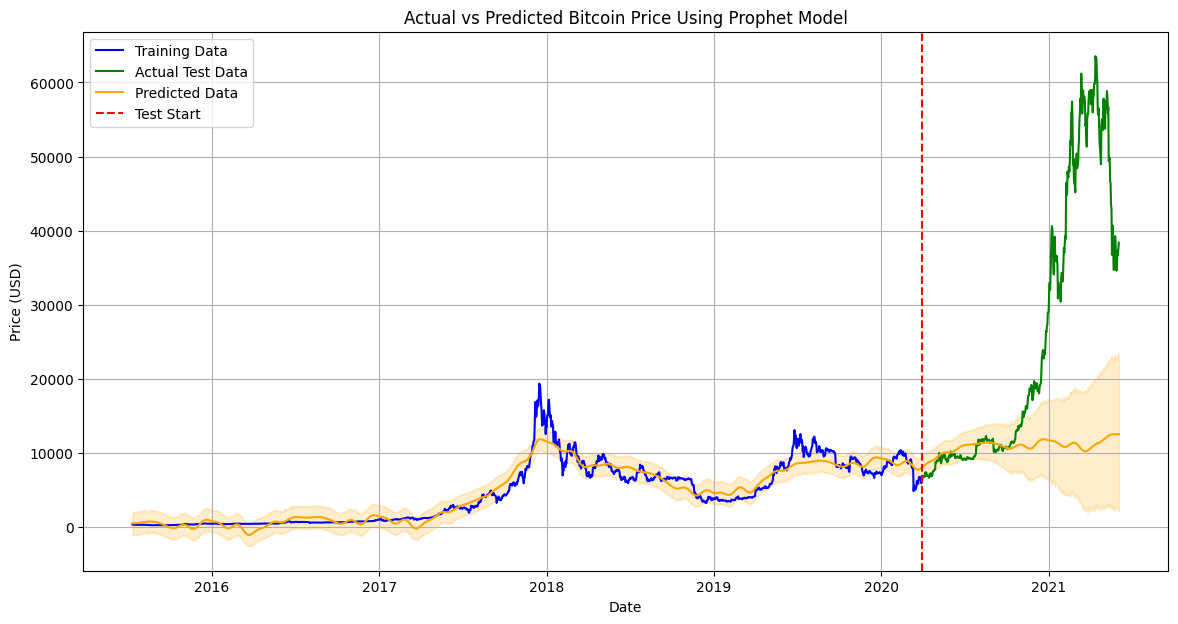

In [75]:
from sklearn.model_selection import train_test_split

# Import Prophet
from prophet import Prophet

# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)  # 80% train, 20% test

# Prepare data for Prophet using the training set
df_prophet = train[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})

# Initialize and fit the Prophet model
model_A = Prophet()
model_A.fit(df_prophet)

# Forecast
future = model_A.make_future_dataframe(periods=len(test))  # Forecast for the length of the test set
forecast_A = model_A.predict(future)

# Prepare the forecast DataFrame to include only the relevant columns
forecast_df = forecast_A[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Merge the actual test data with the forecast data
merged_df = pd.merge(test[['date', 'price']], forecast_df, left_on='date', right_on='ds', how='right')

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(train['date'], train['price'], label='Training Data', color='blue')  # Training data
plt.plot(test['date'], test['price'], label='Actual Test Data', color='green')  # Actual test data
plt.plot(forecast_df['ds'], forecast_df['yhat'], label='Predicted Data', color='orange')  # Predicted data
plt.fill_between(forecast_df['ds'], forecast_df['yhat_lower'], forecast_df['yhat_upper'], color='orange', alpha=0.2)  # Confidence intervals
plt.axvline(x=test['date'].iloc[0], color='red', linestyle='--', label='Test Start')  # Line indicating the start of the test data

# Add titles and labels
plt.title('Actual vs Predicted Bitcoin Price Using Prophet Model')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure that the merged_df DataFrame contains both actual and predicted values (yhat)
# Rename 'price' as 'y' in the merged DataFrame for clarity
merged_df = merged_df.rename(columns={'price': 'y'})

# Drop any rows where either the actual or predicted values are NaN
merged_df = merged_df.dropna(subset=['y', 'yhat'])

# Calculate MAE
mae = mean_absolute_error(merged_df['y'], merged_df['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate RMSE
rmse = mean_squared_error(merged_df['y'], merged_df['yhat'], squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 14640.92138280739
Root Mean Squared Error (RMSE): 22795.898705845684


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Model B

In [142]:
import pandas as pd

def calculate_technical_features(df):
    """
    Calculate technical indicators
    """
    tech_df = pd.DataFrame(index=df.index)

    # Moving Averages
    tech_df['SMA_1'] = df['price'].rolling(window=1).mean()
    tech_df['SMA_7'] = df['price'].rolling(window=7).mean()
    tech_df['SMA_30'] = df['price'].rolling(window=30).mean()
    tech_df['SMA_180'] = df['price'].rolling(window=180).mean()
    tech_df['EMA_1'] = df['price'].ewm(span=1, adjust=False).mean()
    tech_df['EMA_7'] = df['price'].ewm(span=7, adjust=False).mean()
    tech_df['EMA_30'] = df['price'].ewm(span=30, adjust=False).mean()
    tech_df['EMA_180'] = df['price'].ewm(span=180, adjust=False).mean()

    # Price action features
    tech_df['daily_range'] = df['high'] - df['low']
    tech_df['daily_range_pct'] = (df['high'] - df['low']) / df['open'] * 100
    tech_df['gap'] = df['open'] - df['price'].shift(1)
    tech_df['gap_pct'] = (df['open'] - df['price'].shift(1)) / df['price'].shift(1) * 100

    # Volume features
    tech_df['volume_sma_7'] = df['vol.'].rolling(window=7).mean()
    tech_df['volume_ratio'] = df['vol.'] / tech_df['volume_sma_7']

    # Volatility features
    tech_df['volatility_7'] = df['price'].rolling(window=7).std()
    tech_df['volatility_30'] = df['price'].rolling(window=30).std()

    # Additional Lag Features
    tech_df['lag_1'] = df['price'].shift(1)
    tech_df['lag_3'] = df['price'].shift(3)
    tech_df['lag_7'] = df['price'].shift(7)
    tech_df['lag_14'] = df['price'].shift(14)  # 14-day lag
    tech_df['lag_30'] = df['price'].shift(30)  # 30-day lag
    tech_df['lag_mean_7'] = df['price'].shift(7).rolling(window=7).mean()  # 7-day mean of lag
    tech_df['lag_mean_30'] = df['price'].shift(30).rolling(window=30).mean()  # 30-day mean of lag

    # Additional Derived Features
    tech_df['price_change'] = df['price'].pct_change()  # Daily price change percentage
    tech_df['price_change_7'] = df['price'].pct_change(7)  # 7-day price change percentage
    tech_df['high_low_diff'] = df['high'] - df['low']  # Difference between high and low prices
    tech_df['high_low_ratio'] = df['high'] / df['low']  # Ratio of high to low prices
    tech_df['log_price'] = np.log(df['price'])  # Log transformation of price

    # Remove rows with NaN values
    tech_df.dropna(inplace=True)

    return tech_df

In [127]:
def prepare_prophet_data(df, tech_features):
    """
    Prepare data for the Prophet model.
    """
    prophet_df = pd.DataFrame()
    prophet_df['ds'] = df['date']  # Ensure 'date' column is used
    prophet_df['y'] = df['price']

    # Add technical features
    for col in tech_features.columns:
        prophet_df[col] = tech_features[col]

    return prophet_df

In [134]:
def evaluate_best_feature(prophet_df, tech_features):
    """
    Evaluate the best individual feature based on MAE.
    """
    # Remove rows with NaN values
    prophet_df = prophet_df.dropna()

    # Split data into train and test (80/20)
    train_size = int(len(prophet_df) * 0.8)
    train_df = prophet_df.iloc[:train_size]
    test_df = prophet_df.iloc[train_size:]

    # Initialize variables to track the best feature
    best_mae = float('inf')
    best_feature = None

    # Define all numerical features
    numerical_features = list(tech_features.columns)

    # Loop through each feature
    for feature in numerical_features:
        print(f"Training model with feature: {feature}")

        # Train model
        model = train_prophet_model(train_df, [feature])

        # Make predictions
        future = model.make_future_dataframe(periods=len(test_df))
        future = future.merge(prophet_df, on='ds', how='left')  # Merge with features
        forecast = model.predict(future)

        # Evaluate model performance
        y_true = test_df['y'].values
        y_pred = forecast['yhat'].iloc[train_size:].values  # Get predictions for the test set

        # Calculate MAE
        mae = mean_absolute_error(y_true, y_pred)
        print(f"MAE: {mae:.4f}")

        # Update best feature if current MAE is lower
        if mae < best_mae:
            best_mae = mae
            best_feature = feature

    print("\nBest Feature:")
    print(f"Feature: {best_feature}")
    print(f"Best MAE: {best_mae:.4f}")

In [143]:
tech_features = calculate_technical_features(df)
prophet_df = prepare_prophet_data(df, tech_features)
evaluate_best_feature(prophet_df, tech_features)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/x4fcqu7l.json


Training model with feature: SMA_1


DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/tntaqvnu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38858', 'data', 'file=/tmp/tmplftdupq8/x4fcqu7l.json', 'init=/tmp/tmplftdupq8/tntaqvnu.json', 'output', 'file=/tmp/tmplftdupq8/prophet_model6i7pwykb/prophet_model-20241024024727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:47:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/c4hufrm8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/kcws2j0m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

MAE: 0.3887
Training model with feature: SMA_7


02:47:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/el0y5zgp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/4_q2k3gv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33984', 'data', 'file=/tmp/tmplftdupq8/el0y5zgp.json', 'init=/tmp/tmplftdupq8/4_q2k3gv.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelwv27kzby/prophet_model-20241024024731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 1296.4368
Training model with feature: SMA_30


02:47:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/cclgqhs1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/i1pf2vac.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46889', 'data', 'file=/tmp/tmplftdupq8/cclgqhs1.json', 'init=/tmp/tmplftdupq8/i1pf2vac.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelshhsyu3_/prophet_model-20241024024732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 4250.5652
Training model with feature: SMA_180


02:47:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/_17lhznu.json


MAE: 19412.1264
Training model with feature: EMA_1


DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/rceg2oug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16613', 'data', 'file=/tmp/tmplftdupq8/_17lhznu.json', 'init=/tmp/tmplftdupq8/rceg2oug.json', 'output', 'file=/tmp/tmplftdupq8/prophet_model4oozs2di/prophet_model-20241024024733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:47:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/c8br5zqg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/pj7nt8jw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

MAE: 0.3887
Training model with feature: EMA_7


02:47:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/dzgpfon6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/9m8ch2jb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55249', 'data', 'file=/tmp/tmplftdupq8/dzgpfon6.json', 'init=/tmp/tmplftdupq8/9m8ch2jb.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modeli9ye7z3k/prophet_model-20241024024738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 1001.9093
Training model with feature: EMA_30


02:47:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/6fbey9x8.json


MAE: 2935.4696
Training model with feature: EMA_180


DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/pz6rstue.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68446', 'data', 'file=/tmp/tmplftdupq8/6fbey9x8.json', 'init=/tmp/tmplftdupq8/pz6rstue.json', 'output', 'file=/tmp/tmplftdupq8/prophet_model0mh71snb/prophet_model-20241024024739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:47:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/uotjynjj.json


MAE: 11810.1171
Training model with feature: daily_range


DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/oe7vjtvf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85735', 'data', 'file=/tmp/tmplftdupq8/uotjynjj.json', 'init=/tmp/tmplftdupq8/oe7vjtvf.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modeliuc_mxbn/prophet_model-20241024024740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:47:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/eqgbnzpm.json


MAE: 17029.1421
Training model with feature: daily_range_pct


DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/d5m7u4k2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82625', 'data', 'file=/tmp/tmplftdupq8/eqgbnzpm.json', 'init=/tmp/tmplftdupq8/d5m7u4k2.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelpa1vt5rf/prophet_model-20241024024742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:47:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/pzxj5yz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/ty1lg63g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

MAE: 19497.5099
Training model with feature: gap


02:47:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/e9w77lp5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/pxd_rcv1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20704', 'data', 'file=/tmp/tmplftdupq8/e9w77lp5.json', 'init=/tmp/tmplftdupq8/pxd_rcv1.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelz0jhhplh/prophet_model-20241024024744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 19168.6725
Training model with feature: gap_pct


02:47:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/zdnjaui1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/0es7hn0y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3130', 'data', 'file=/tmp/tmplftdupq8/zdnjaui1.json', 'init=/tmp/tmplftdupq8/0es7hn0y.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelx_4tkgo8/prophet_model-20241024024745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 19472.4877
Training model with feature: volume_sma_7


02:47:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/qzt6i3hh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/2p6hrp0n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92222', 'data', 'file=/tmp/tmplftdupq8/qzt6i3hh.json', 'init=/tmp/tmplftdupq8/2p6hrp0n.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelnxhjyx_f/prophet_model-20241024024746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 19681.0177
Training model with feature: volume_ratio


02:47:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/40cg0w0a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/3zuke_vz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58353', 'data', 'file=/tmp/tmplftdupq8/40cg0w0a.json', 'init=/tmp/tmplftdupq8/3zuke_vz.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelw5qixg4b/prophet_model-20241024024747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 19446.9548
Training model with feature: volatility_7


02:47:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/ua53do1_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/tcskgk8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87475', 'data', 'file=/tmp/tmplftdupq8/ua53do1_.json', 'init=/tmp/tmplftdupq8/tcskgk8_.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelp1683zyv/prophet_model-20241024024748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 16916.2750
Training model with feature: volatility_30


02:47:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/o3t1jw7i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/58l7ci65.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9557', 'data', 'file=/tmp/tmplftdupq8/o3t1jw7i.json', 'init=/tmp/tmplftdupq8/58l7ci65.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelk1goh7bu/prophet_model-20241024024749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 15139.5046
Training model with feature: lag_1


02:47:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/n5gx1or9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/x1w3lk3g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88256', 'data', 'file=/tmp/tmplftdupq8/n5gx1or9.json', 'init=/tmp/tmplftdupq8/x1w3lk3g.json', 'output', 'file=/tmp/tmplftdupq8/prophet_model_1fw8d8c/prophet_model-20241024024750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 910.7687
Training model with feature: lag_3


02:47:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/m285rqgt.json


MAE: 1964.6626
Training model with feature: lag_7


DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/wytsnq3l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76253', 'data', 'file=/tmp/tmplftdupq8/m285rqgt.json', 'init=/tmp/tmplftdupq8/wytsnq3l.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelw9pplo8p/prophet_model-20241024024751.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:47:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/e20eba6s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/9ar1gzlh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

MAE: 3808.9690
Training model with feature: lag_14


02:47:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/f1uivvf_.json


MAE: 7023.7861
Training model with feature: lag_30


DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/wpm314zd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92506', 'data', 'file=/tmp/tmplftdupq8/f1uivvf_.json', 'init=/tmp/tmplftdupq8/wpm314zd.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modell1acjvr2/prophet_model-20241024024753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:47:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/lxow_hnt.json


MAE: 14601.5685
Training model with feature: lag_mean_7


DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/va3e5w4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62044', 'data', 'file=/tmp/tmplftdupq8/lxow_hnt.json', 'init=/tmp/tmplftdupq8/va3e5w4a.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelzo43eqt2/prophet_model-20241024024754.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:47:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/07pix1z3.json


MAE: 4538.4967
Training model with feature: lag_mean_30


DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/t8f2ueh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63183', 'data', 'file=/tmp/tmplftdupq8/07pix1z3.json', 'init=/tmp/tmplftdupq8/t8f2ueh7.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modela6u6bd64/prophet_model-20241024024756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:47:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/7i23ilym.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/tv2norr9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

MAE: 17658.3526
Training model with feature: price_change


02:47:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/_jctgint.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/y_4cysv7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56128', 'data', 'file=/tmp/tmplftdupq8/_jctgint.json', 'init=/tmp/tmplftdupq8/y_4cysv7.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modeliy1hv7bp/prophet_model-20241024024758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 19128.9899
Training model with feature: price_change_7


02:47:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/_kaowv7u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/10xy21qw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63029', 'data', 'file=/tmp/tmplftdupq8/_kaowv7u.json', 'init=/tmp/tmplftdupq8/10xy21qw.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modeli0b9ei8c/prophet_model-20241024024759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:47:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 19391.8837
Training model with feature: high_low_diff


02:47:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/18lzq37x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/b5lrl4qq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86342', 'data', 'file=/tmp/tmplftdupq8/18lzq37x.json', 'init=/tmp/tmplftdupq8/b5lrl4qq.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelp4u4to35/prophet_model-20241024024800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:48:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 17029.1421
Training model with feature: high_low_ratio


02:48:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/bv_xli4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplftdupq8/xehi1u74.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99844', 'data', 'file=/tmp/tmplftdupq8/bv_xli4g.json', 'init=/tmp/tmplftdupq8/xehi1u74.json', 'output', 'file=/tmp/tmplftdupq8/prophet_modelh8foprx1/prophet_model-20241024024801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:48:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE: 19498.5792
Training model with feature: log_price


02:48:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 12703.6233

Best Feature:
Feature: SMA_1
Best MAE: 0.3887


In [125]:
# Example usage
def main():
    # Assuming you have your data in a DataFrame called 'df'
    # df = pd.read_csv('your_data.csv', index_col='date', parse_dates=True)

    # Find best features
    best_features = find_best_features(df, max_features=3)

    # Print top 10 feature combinations
    print("\nTop 10 Feature Combinations:")
    print(best_features.head(10))

    # Get the single best combination
    best_combo = best_features.iloc[0]
    print("\nBest Feature Combination:")
    print(f"Features: {best_combo['features']}")
    print(f"MAPE: {best_combo['mape']:.4f}")
    print(f"RMSE: {best_combo['rmse']:.4f}")

In [126]:
print("\nBest Feature Combination:")



Best Feature Combination:


In [ ]:
# 5. Predict on the test data
forecast_test = prophet_model.predict(future_test)

# 6. Plot actual vs predicted for the test set
plt.figure(figsize=(14, 7))

# Plot actual values from test set
plt.plot(test_df['ds'], test_df['y'], label='Actual', color='blue')

# Plot predicted values from Prophet model
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Predicted', color='orange')

plt.title('Actual vs Predicted Values on Test Set')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate RMSE
rmse = mean_squared_error(test_df['y'], forecast_test['yhat'], squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared
r_squared = 1 - (sum((test_df['y'] - forecast_test['yhat'])**2) / sum((test_df['y'] - test_df['y'].mean())**2))
print(f'R-squared: {r_squared}')

In [ ]:
# Save the model for future use
import joblib

joblib.dump(prophet_model, 'model_B.pkl')

# Part 2: Incorporating Numerical and Text Features

In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def calculate_technical_features(df):
    """
    Calculate technical indicators including moving averages and lag features
    """
    tech_df = pd.DataFrame(index=df.index)

    # Moving Averages
    tech_df['SMA_7'] = df['price'].rolling(window=7).mean()
    tech_df['SMA_30'] = df['price'].rolling(window=30).mean()
    tech_df['SMA_180'] = df['price'].rolling(window=180).mean()
    tech_df['EMA_7'] = df['price'].ewm(span=7, adjust=False).mean()
    tech_df['EMA_30'] = df['price'].ewm(span=30, adjust=False).mean()
    tech_df['EMA_180'] = df['price'].ewm(span=180, adjust=False).mean()

    # Lag Features
    tech_df['lag_1'] = df['price'].shift(1)
    tech_df['lag_7'] = df['price'].shift(7)
    tech_df['lag_30'] = df['price'].shift(30)

    return tech_df

In [ ]:
def prepare_text_features(df, text_encoder):
    """
    Process text columns using BERT
    """
    print("Encoding text features with BERT...")

    # Combine only non-empty text columns for each row
    text_columns = [col for col in df.columns if col.startswith('top_')]
    df['combined_text'] = df[text_columns].apply(
        lambda x: ' '.join([str(val) for val in x if val != '']),
        axis=1
    )

    embeddings_list = []
    for text in tqdm(df['combined_text']):
        embedding = text_encoder.encode_text(text)
        embeddings_list.append(embedding[0])

    embeddings_df = pd.DataFrame(
        embeddings_list,
        columns=[f'bert_{i}' for i in range(len(embeddings_list[0]))],
        index=df.index
    )

    return embeddings_df

In [ ]:
def prepare_prophet_data(df, bert_features, tech_features):
    """
    Prepare data for Prophet model
    """
    prophet_df = pd.DataFrame()
    prophet_df['ds'] = df['date']
    prophet_df['y'] = df['price']

    # Add BERT features
    for col in bert_features.columns:
        prophet_df[col] = bert_features[col]

    # Add technical features
    for col in tech_features.columns:
        prophet_df[col] = tech_features[col]

    return prophet_df

In [ ]:
def train_prophet_model(prophet_df, feature_columns):
    """
    Train Prophet model with all features
    """
    model = Prophet(
        daily_seasonality=True,
        weekly_seasonality=True,
        yearly_seasonality=True,
        changepoint_prior_scale=0.05
    )

    # Add all features as regressors
    for col in feature_columns:
        if col not in ['ds', 'y']:
            model.add_regressor(col)

    model.fit(prophet_df)

    return model

In [ ]:
def main(df_path):
    """
    Main function to run the entire pipeline
    """

    # Calculate technical features
    print("Calculating technical features...")
    tech_features = calculate_technical_features(df)

    # Get BERT features
    text_encoder = TextEncoder()
    bert_features = prepare_text_features(df, text_encoder)

    # Prepare final dataset
    prophet_df = prepare_prophet_data(df, bert_features, tech_features)

    # Remove rows with NaN values
    prophet_df = prophet_df.dropna()

    # Split data into train and test (80/20)
    train_size = int(len(prophet_df) * 0.8)
    train_df = prophet_df.iloc[:train_size]
    test_df = prophet_df.iloc[train_size:]

    # Train model
    print("Training Prophet model...")
    feature_columns = [col for col in prophet_df.columns if col not in ['ds', 'y']]
    model = train_prophet_model(train_df, feature_columns)

    # Make predictions
    forecast = model.predict(test_df)

    # Calculate metrics
    y_true = test_df['y'].values
    y_pred = forecast['yhat'].values

    mse = np.mean((y_true - y_pred) ** 2)
    mae = np.mean(np.abs(y_true - y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    rmse = mean_squared_error(merged_df['y'], merged_df['yhat'], squared=False)


    print("\nModel Performance Metrics:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"RMSE: {rmse}")


    return model, forecast, y_true, y_pred, test_df['ds']

if __name__ == "__main__":
    # Replace with your dataset path
    df_path = df
    model, forecast, y_true, y_pred, dates = main(df_path)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_forecast_comparison(dates, y_true, y_pred, title="Actual vs Predicted Values"):
    """
    Plot actual vs predicted values with confidence bands

    Parameters:
    -----------
    dates : array-like
        Dates for the x-axis
    y_true : array-like
        Actual values
    y_pred : array-like
        Predicted values
    title : str
        Plot title
    """
    # Set style
    plt.style.use('seaborn')

    # Create figure and axis
    plt.figure(figsize=(12, 6))

    # Plot actual values
    plt.plot(dates, y_true, label='Actual', color='blue', marker='o', linestyle='-', alpha=0.7)

    # Plot predicted values
    plt.plot(dates, y_pred, label='Predicted', color='red', marker='o', linestyle='--', alpha=0.7)

    # Customize the plot
    plt.title(title, fontsize=14, pad=20)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    return plt

# Create and display the plot
plot = plot_forecast_comparison(dates, y_true, y_pred,
                              title="Model Forecast vs Actual Values (Test Set)")
plt.show()